# Trabajo con Pandas

Vamos a hacer un pequeño ejercicio de precalentamiento para trabajar con Pandas. Nosotros proveemos una pequeña base, y se supone que tu irás armando más y más, para ir aprendiendo a manejar dataframes. 

### Visualización de los datos comunales

Primero vamos a cargar un `DataFrame` con el nombre, región, presupuesto y población de cada comuna, y un poco de limpieza de datos

Los siguientes tres bloques exportan codigos.csv (codigos de comuna), población.csv (cuanta gente vive en la comuna) y presupuesto.csv (el presupuesto comunal). Evitamos descrbir más los datasets, pero puedes llamar a una descripción usando dataframe.info()

In [1]:
import pandas as pd

df_codigos = pd.read_csv("codigos.csv", delimiter=';')
df_codigos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Código Región       346 non-null    int64 
 1   Nombre Región       346 non-null    object
 2   Abreviatura Región  346 non-null    object
 3   Código Provincia    346 non-null    int64 
 4   Nombre Provincia    346 non-null    object
 5   Código Comuna 2018  346 non-null    int64 
 6   Nombre Comuna       346 non-null    object
dtypes: int64(3), object(4)
memory usage: 19.0+ KB


In [3]:
df_poblacion = pd.read_csv("poblacion.csv", delimiter=';')


In [6]:
df_presupuesto = pd.read_csv("presupuesto_2019.csv", delimiter=';')
df_presupuesto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CODIGO       345 non-null    int64 
 1   MUNICIPIO    345 non-null    object
 2   PRESUPUESTO  345 non-null    object
dtypes: int64(1), object(2)
memory usage: 8.2+ KB


### Limpieza

Fijate que el ítem PRESUPUESTO es de tipo object, y no int. Por qué será esto? 
- inspecciona que esta pasando con PRESUPUESTO
- arreglalo. Una posibilidad es que los presupuestos que no están se reemplacen con un 0, otra es sacar esas filas. 
- corre df_presupuesto['PRESUPUESTO'] = df_presupuesto['PRESUPUESTO'].astype(int) para castear bien el presupuesto

### Joins

Las siguientes líneas nos van a servir para hacer `merge` entre los _datasets_. Tenemos solo un join, tu debes escribir lo que falta para tener un solo dataframe que tenga una fila por comuna, con todos los datos. **IMPORTANTE** Muchas veces, cuando apliquemos técnicas de estadística o machine learning, vamos a buscar esta forma, en donde todas las entidades son un vector. 

**Consejo**: una vez que hagas los joins, te aconsejamos quedarte solo con ['Nombre Comuna', 'POBLACIÓN', 'PRESUPUESTO', 'Nombre Región']. 



In [8]:
df_extended = df_codigos.merge(df_poblacion, left_on='Código Comuna 2018', right_on='CODIGO')
df_extended.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345 entries, 0 to 344
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Código Región       345 non-null    int64 
 1   Nombre Región       345 non-null    object
 2   Abreviatura Región  345 non-null    object
 3   Código Provincia    345 non-null    int64 
 4   Nombre Provincia    345 non-null    object
 5   Código Comuna 2018  345 non-null    int64 
 6   Nombre Comuna       345 non-null    object
 7   CODIGO              345 non-null    int64 
 8   MUNICIPIO           345 non-null    object
 9   POBLACIÓN           345 non-null    int64 
dtypes: int64(5), object(5)
memory usage: 29.6+ KB


In [14]:
df_extended.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 345 entries, 0 to 344
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Nombre Comuna  345 non-null    object
 1   POBLACIÓN      345 non-null    int64 
 2   PRESUPUESTO    345 non-null    int32 
 3   Nombre Región  345 non-null    object
dtypes: int32(1), int64(1), object(2)
memory usage: 12.1+ KB


Y ahora vamos a hacer un gráfico interactivo donde se vea el presupuesto en función de la población. ¿Puedes ver un outlier?

Text(0, 0.5, 'Presupuesto')

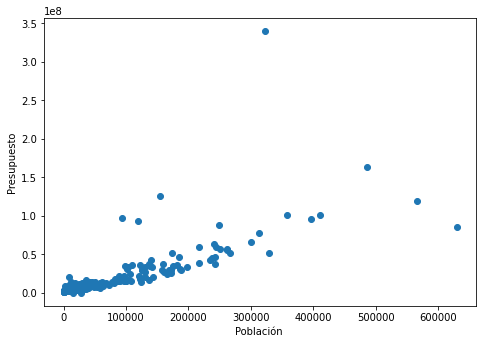

In [16]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(df_extended['POBLACIÓN'], df_extended['PRESUPUESTO'])
ax.set_xlabel('Población ')
ax.set_ylabel('Presupuesto')


## De aquí hacia abajo puedes completar el resto de la actividad! 